In this project, we pratice how adding hidden layers of neurons to a neural network can improve its ability to capture nonlinearity in the data. We tested different neural networks models on a dataset that we generated with deliberate nonlinearity.

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. [The load_digits() function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.


In [3]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [4]:
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Loading the data set

In [5]:
labels = pd.Series(digits_data['target'])

In [6]:
data = pd.DataFrame(digits_data['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Visualize some of the images in the dataset.

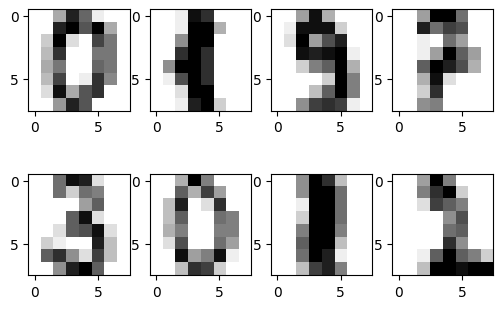

In [7]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-NN model

Setting a pipeline for testing and training k-nn models then performs 4-fold cross validation

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [20]:
knn_one_accuracies = cross_validate(1)
print('Average accuarcy across 4 folds with 1 neighbors')
print(np.mean(knn_one_accuracies))

Average accuarcy across 4 folds with 1 neighbors
0.9888728037614452


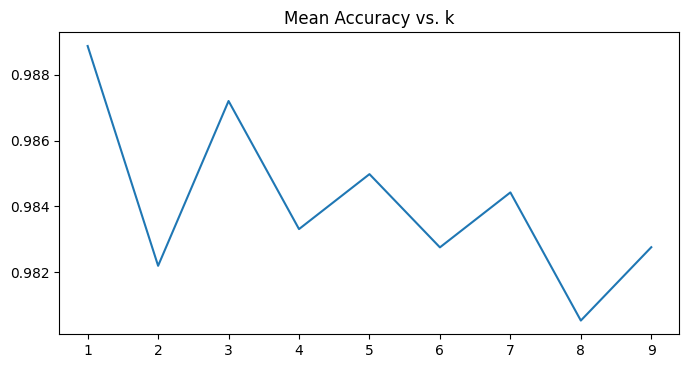

In [21]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

In [64]:
k_overall_accuracies

[0.9888728037614452,
 0.9821912892848305,
 0.9872011878247959,
 0.9833073496659243,
 0.9849777282850779,
 0.9827517941103686,
 0.9844221727295223,
 0.9805270972531551,
 0.9827567433803515]

The overall acuracy of the knn method is about 98%

## Neural Network With One Hidden Layer

In [49]:
from sklearn.neural_network import MLPClassifier

# 50% Train / test validation
def train_nn(neuron, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron, n_splits):
    fold_accuracies_test = []
    fold_accuracies_train = []
    kf = KFold(n_splits = n_splits, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron, train_features, train_labels)
        overall_accuracy_test = test(model, test_features, test_labels)
        fold_accuracies_test.append(overall_accuracy_test)
        overall_accuracy_train = test(model, train_features, train_labels)
        fold_accuracies_train.append(overall_accuracy_train)
    return fold_accuracies_train, fold_accuracies_test

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

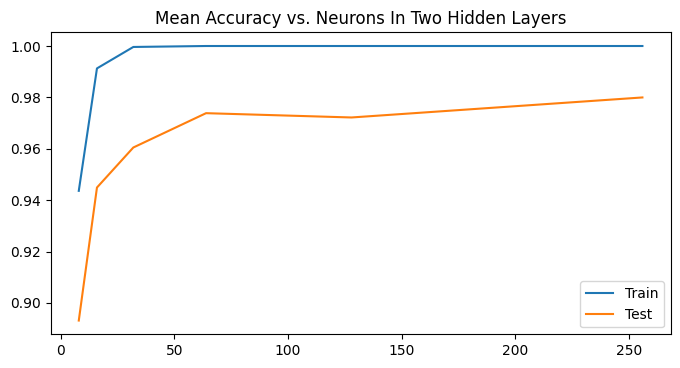

In [59]:
# Using 4-fold cross validation:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies_train = []
nn_one_accuracies_test = []

for n in nn_one_neurons:
    nn_accuracies_train, nn_accuracies_test = cross_validate(n, 4)
    nn_mean_accuracy_train = np.mean(nn_accuracies_train)
    nn_one_accuracies_train.append(nn_mean_accuracy_train)
    nn_mean_accuracy_test = np.mean(nn_accuracies_test)
    nn_one_accuracies_test.append(nn_mean_accuracy_test)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies_train, label='Train')
plt.plot(x, nn_one_accuracies_test, label='Test')
plt.legend()

In [60]:
print('accuracy for train set')     
print(nn_one_accuracies_train)
print('accuracy for test set') 
print(nn_one_accuracies_test)

accuracy for train set
[0.9436170113164984, 0.9912817305849465, 0.9996289424349967, 1.0, 1.0, 1.0]
accuracy for test set
[0.8931267013115566, 0.9449096758228162, 0.9604887404107894, 0.9738530066815144, 0.9721789161098738, 0.979974016332591]


It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 97%. Though, our simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

## Neural Network With Two Hidden Layers

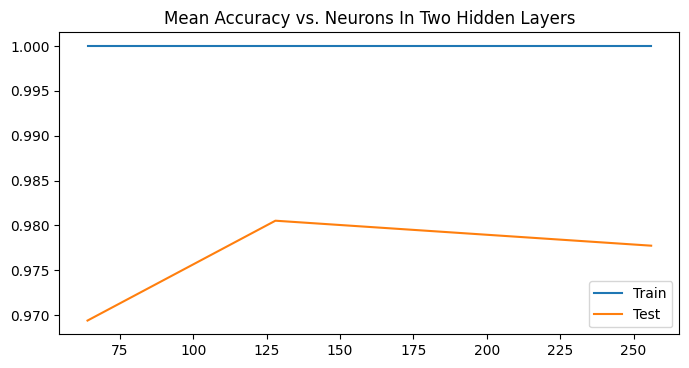

In [63]:
# Testing 2 layers model using 4-fold cross validation:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies_train = []
nn_two_accuracies_test = []

for n in nn_two_neurons:
    nn_accuracies_train, nn_accuracies_test = cross_validate(n, 4)
    nn_mean_accuracy_train = np.mean(nn_accuracies_train)
    nn_two_accuracies_train.append(nn_mean_accuracy_train)
    nn_mean_accuracy_test = np.mean(nn_accuracies_test)
    nn_two_accuracies_test.append(nn_mean_accuracy_test)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies_train, label='Train')
plt.plot(x, nn_two_accuracies_test, label='Test')
plt.legend()

In [61]:
print('accuracy for train set')    
print(nn_two_accuracies_train)
print('accuracy for test set') 
print(nn_two_accuracies_test)

accuracy for train set
[1.0, 1.0, 1.0]
accuracy for test set
[0.9671690175699085, 0.9771875773323434, 0.978859193268993]


Using 2 hidden layers improved our simple accuracy to about 98%. There is no overfitting in any of our models

## Neural Network With Three Hidden Layers

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

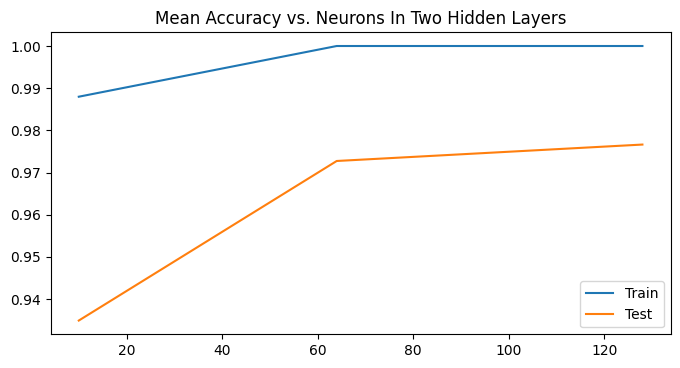

In [57]:
# Testing 3 layers model using 6-fold cross validation:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies_train = []
nn_three_accuracies_test = []

for n in nn_three_neurons:
    nn_accuracies_train, nn_accuracies_test = cross_validate(n, 6)
    nn_mean_accuracy_train = np.mean(nn_accuracies_train)
    nn_three_accuracies_train.append(nn_mean_accuracy_train)
    nn_mean_accuracy_test = np.mean(nn_accuracies_test)
    nn_three_accuracies_test.append(nn_mean_accuracy_test)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies_train, label='Train')
plt.plot(x, nn_three_accuracies_test, label='Test')
plt.legend()

In [62]:
print('accuracy for train set') 
print(nn_three_accuracies_train)
print('accuracy for test set') 
print(nn_three_accuracies_test) 

accuracy for train set
[0.9879784788387042, 1.0, 1.0]
accuracy for test set
[0.9349108138238572, 0.9727406168710516, 0.9766350798959494]


Using 3 hidden layers returned a simple accuracy of nearly 98%, even with 6-fold cross validation.